In [39]:
# ================================================
# Hotel Review Sentiment Text Classification
# ================================================
# Objective:
# The project automates the classification of hotel guest reviews from TripAdvisor
# into Negative (1-2 stars), Neutral (3 stars), or Positive (4-5 stars).
# This helps hotel management respond effectively and monitor guest satisfaction.


In [84]:
# Data handling
!pip install pandas numpy

# NLP preprocessing
!pip install nltk

# Machine learning models and evaluation
!pip install scikit-learn

# Optional: if using Jupyter Notebook for running the code
!pip install notebook

!pip install wordcloud



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [85]:
# -----------------------------
# 1. Import Libraries
# -----------------------------
import pandas as pd
import re
import nltk
from sklearn.utils import resample
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [86]:
# -----------------------------
# 2. Download Required NLTK Packages
# -----------------------------
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS1\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [87]:
# -----------------------------
# 3. Load and Inspect Dataset
# -----------------------------
df = pd.read_csv('Combined_TripAdvisor_Guest_Reviews_in_ Salalah_Oman_Dataset (1).csv')
df.head(5)

,Hotel Name,User Location,Rating,Review Title,Review Text,Helpful Votes,Trip Type,Stay Date,Created Date,Published Date,Language,Value,Rooms,Location,Cleanliness,Service,Sleep Quality
0,Al Baleed Resort Salalah by Anantara,NaN,5,Ein Erlebnis mit excellenten Mitarbeitern v Ho...,"Wir hatten das große Glück, eine Woche in dies...",0,FRIENDS,31/12/2024,27/12/2024,27/12/2024,German,5,5,5,5,5,5
1,Al Baleed Resort Salalah by Anantara,Paris,5,Three days in a paradise,At our very late arrival Veronica very nice an...,1,NONE,29/02/2024,21/02/2024,20/02/2024,English,5,5,5,5,5,5
2,Al Baleed Resort Salalah by Anantara,Lengnau,5,Wohlfühloase pur,Ein Hotel das keine Wünsche offen lässt. \nWun...,0,SOLO,31/12/2024,27/12/2024,27/12/2024,German,0,0,0,0,0,0
3,Al Baleed Resort Salalah by Anantara,NaN,5,Perfekt👍👍👍,"Die Hotelanlage,- das Essen wie auch das Perso...",0,COUPLES,31/12/2024,26/12/2024,25/12/2024,German,4,5,5,5,5,5
4,Al Baleed Resort Salalah by Anantara,Dubai,5,"Excellent for couples and families, very frien...",Definitely recommended to everyone. Asad and J...,0,NONE,31/12/2024,24/12/2024,23/12/2024,English,3,5,5,5,5,5


In [88]:
# Filter only English reviews
df = df[df['Language'] == 'English'].copy()

# Create Full_Review directly (NO duplicate columns)
df['Full_Review'] = (
    df['Review Title'].fillna('') + ' ' +
    df['Review Text'].fillna('')
)

df.head()


,Hotel Name,User Location,Rating,Review Title,Review Text,Helpful Votes,Trip Type,Stay Date,Created Date,Published Date,Language,Value,Rooms,Location,Cleanliness,Service,Sleep Quality,Full_Review
1,Al Baleed Resort Salalah by Anantara,Paris,5,Three days in a paradise,At our very late arrival Veronica very nice an...,1,NONE,29/02/2024,21/02/2024,20/02/2024,English,5,5,5,5,5,5,Three days in a paradise At our very late arri...
4,Al Baleed Resort Salalah by Anantara,Dubai,5,"Excellent for couples and families, very frien...",Definitely recommended to everyone. Asad and J...,0,NONE,31/12/2024,24/12/2024,23/12/2024,English,3,5,5,5,5,5,"Excellent for couples and families, very frien..."
5,Al Baleed Resort Salalah by Anantara,Salzburg,5,REALLY highly recommended,Before starting saison (20th Dec.)... very cal...,0,COUPLES,31/12/2024,23/12/2024,23/12/2024,English,5,5,5,5,5,5,REALLY highly recommended Before starting sais...
6,Al Baleed Resort Salalah by Anantara,Bacau,5,A wonderful place,"A quiet place, by the sea, with a gorgeous bea...",0,NONE,31/12/2024,23/12/2024,23/12/2024,English,4,5,5,5,5,5,"A wonderful place A quiet place, by the sea, w..."
7,Al Baleed Resort Salalah by Anantara,Bratislava,5,Beautiful & relaxed days in exclusive resort,We have spent beautiful & relaxed days in this...,0,COUPLES,31/12/2024,22/12/2024,21/12/2024,English,0,0,0,0,0,0,Beautiful & relaxed days in exclusive resort W...


In [89]:
# -----------------------------
# 4. Create Sentiment Labels
# -----------------------------
# Mapping ratings to sentiment categories
def rating_to_sentiment(rating):
    if rating in [1, 2]:
        return 'Negative'
    elif rating == 3:
        return 'Neutral'
    else:  # 4, 5
        return 'Positive'

df['Sentiment'] = df['Rating'].apply(rating_to_sentiment)

# Keep only necessary columns
df = df[['Full_Review', 'Rating', 'Sentiment']]

print("English reviews count:", len(df))
df['Sentiment'].value_counts()

English reviews count: 8323


Sentiment
Positive    7320
Neutral      549
Negative     454
Name: count, dtype: int64

In [90]:
df_neg = df[df['Sentiment'] == 'Negative']
df_neu = df[df['Sentiment'] == 'Neutral']
df_pos = df[df['Sentiment'] == 'Positive']

min_size = len(df_neg)

df_neu_balanced = resample(df_neu, n_samples=min_size, random_state=42)
df_pos_balanced = resample(df_pos, n_samples=min_size, random_state=42)

df_balanced = pd.concat([df_neg, df_neu_balanced, df_pos_balanced])
df_balanced = df_balanced.sample(frac=1, random_state=42)

print(df_balanced['Sentiment'].value_counts())


Sentiment
Negative    454
Positive    454
Neutral     454
Name: count, dtype: int64


In [91]:
# -----------------------------
# 6. Text Preprocessing
# -----------------------------
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)


print("Starting text preprocessing...")
df_balanced['Cleaned_Review'] = df_balanced['Full_Review'].apply(preprocess_text)
print("Preprocessing complete!")

# Preview
df_balanced[['Full_Review', 'Cleaned_Review', 'Sentiment']].head(3)

Starting text preprocessing...
Preprocessing complete!


,Full_Review,Cleaned_Review,Sentiment
3240,Not the top Crowne Plaza Salalah resort nee...,top crowne plaza salalah resort need modernize...,Negative
10633,Oman trip The hotel is large. Nicely located. ...,oman trip hotel large nicely located beach cle...,Positive
10613,Well done Rotana Salalah A week at Rotana with...,well done rotana salalah week rotana family we...,Positive


In [92]:

# Select features (cleaned review text) and target (sentiment)
X = df_balanced['Cleaned_Review']  # Input text
y = df_balanced['Sentiment']       # Target labels: Negative, Neutral, Positive

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# TF-IDF vectorization (convert text into numeric features)
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))  # unigrams + bigrams
X_train_tfidf = tfidf.fit_transform(X_train)  # Learn vocabulary from training data
X_test_tfidf = tfidf.transform(X_test)        # Transform test data using same vocabulary

print("TF-IDF feature extraction complete!")


TF-IDF feature extraction complete!


In [93]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize SVM with LINEAR kernel
svm_model = SVC(kernel='linear', random_state=42)

# Train the model
svm_model.fit(X_train_tfidf, y_train)

# Predict on test data
y_pred_svm = svm_model.predict(X_test_tfidf)

# Evaluate
print("=== SVM (Linear Kernel) Evaluation ===")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


=== SVM (Linear Kernel) Evaluation ===
Accuracy: 0.8095238095238095

Classification Report:
               precision    recall  f1-score   support

    Negative       0.81      0.77      0.79        91
     Neutral       0.73      0.77      0.75        91
    Positive       0.89      0.89      0.89        91

    accuracy                           0.81       273
   macro avg       0.81      0.81      0.81       273
weighted avg       0.81      0.81      0.81       273


Confusion Matrix:
 [[70 19  2]
 [13 70  8]
 [ 3  7 81]]


In [94]:
from sklearn.naive_bayes import MultinomialNB

# Initialize Multinomial Naive Bayes
mnb_model = MultinomialNB()

# Train the model
mnb_model.fit(X_train_tfidf, y_train)

# Predict on test data
y_pred_mnb = mnb_model.predict(X_test_tfidf)

# Evaluate performance
print("=== Multinomial Naive Bayes Evaluation ===")
print("Accuracy:", accuracy_score(y_test, y_pred_mnb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_mnb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_mnb))


=== Multinomial Naive Bayes Evaluation ===
Accuracy: 0.7838827838827839

Classification Report:
               precision    recall  f1-score   support

    Negative       0.68      0.89      0.77        91
     Neutral       0.83      0.54      0.65        91
    Positive       0.88      0.92      0.90        91

    accuracy                           0.78       273
   macro avg       0.80      0.78      0.78       273
weighted avg       0.80      0.78      0.78       273


Confusion Matrix:
 [[81  9  1]
 [32 49 10]
 [ 6  1 84]]


In [95]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import pandas as pd

# Create a comparison table for SVM and Multinomial Naive Bayes
comparison_results = {
    "Model": ["SVM (Linear Kernel)", "Multinomial Naive Bayes"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_mnb)
    ],
    "Precision": [
        precision_score(y_test, y_pred_svm, average='weighted'),
        precision_score(y_test, y_pred_mnb, average='weighted')
    ],
    "Recall": [
        recall_score(y_test, y_pred_svm, average='weighted'),
        recall_score(y_test, y_pred_mnb, average='weighted')
    ],
    "F1-Score": [
        f1_score(y_test, y_pred_svm, average='weighted'),
        f1_score(y_test, y_pred_mnb, average='weighted')
    ]
}

# Convert to DataFrame
comparison_df = pd.DataFrame(comparison_results)

# Display the comparison table
comparison_df


,Model,Accuracy,Precision,Recall,F1-Score
0,SVM (Linear Kernel),0.809524,0.811077,0.809524,0.809911
1,Multinomial Naive Bayes,0.783883,0.798464,0.783883,0.775996


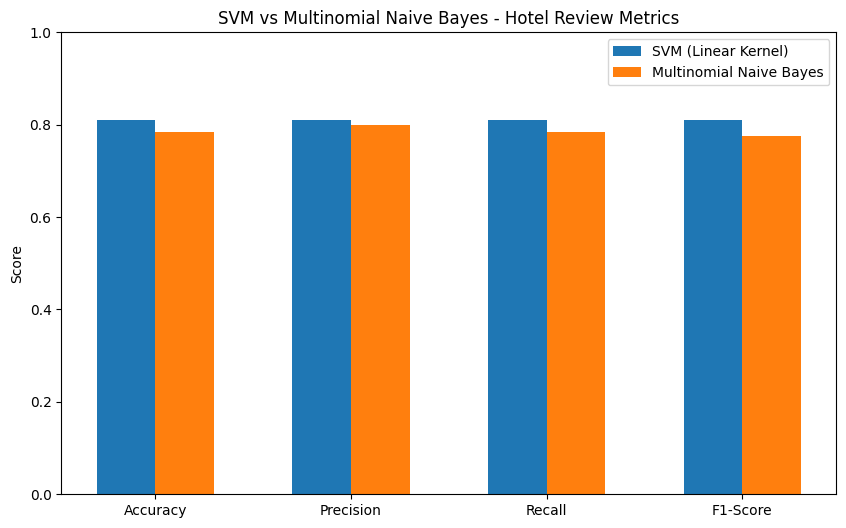

In [96]:

import matplotlib.pyplot as plt
# -----------------------------
# Plotting grouped bar chart
# -----------------------------
plt.figure(figsize=(10,6))

metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
x = range(len(metrics))

# Plot SVM bars (left shifted)
plt.bar([i-0.15 for i in x], comparison_df.iloc[0,1:], width=0.3, label=comparison_df["Model"][0])

# Plot Naive Bayes bars (right shifted)
plt.bar([i+0.15 for i in x], comparison_df.iloc[1,1:], width=0.3, label=comparison_df["Model"][1])

# X-axis labels and title
plt.xticks(x, metrics)
plt.ylim(0,1)
plt.ylabel("Score")
plt.title("SVM vs Multinomial Naive Bayes - Hotel Review Metrics")
plt.legend()
plt.show()

In [97]:
# -----------------------------
# Function to predict sentiment (English reviews only)
# -----------------------------
def predict_sentiment(title, review, model, vectorizer):
    """
    Combine review title and text, preprocess, convert to TF-IDF,
    and predict sentiment using the given model.
    Only works for English reviews.
    """
    # Combine title and review text
    text = title + " " + review
    
    # Preprocess text
    cleaned_text = preprocess_text(text)
    
    # Check if cleaned text is empty
    if cleaned_text.strip() == "":
        return "Error: Input text must be in English and non-empty"
    
    # Transform text to TF-IDF features
    text_tfidf = vectorizer.transform([cleaned_text])
    
    # Predict sentiment
    prediction = model.predict(text_tfidf)
    
    return prediction[0]

# -----------------------------
# Input example (English reviews only)
# -----------------------------
new_title = input("Enter the review title (English only): ")
new_review = input("Enter the review text (English only): ")

# Make predictions
svm_prediction = predict_sentiment(new_title, new_review, svm_model, tfidf)

# Display results
print("\nPredicted Sentiment:")
print("SVM:", svm_prediction)


Enter the review title (English only):  Hate it
Enter the review text (English only):  dont visit this place. Bad service



Predicted Sentiment:
SVM: Negative


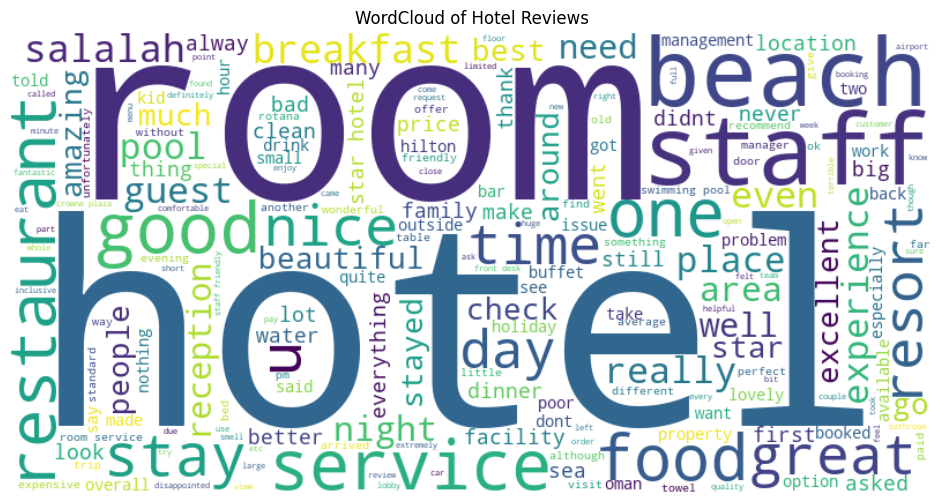

In [98]:
# -----------------------------
# WordCloud for Hotel Reviews
# -----------------------------

# Install WordCloud if not installed
# !pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all cleaned reviews into one text
all_reviews_text = ' '.join(df_balanced['Cleaned_Review'])

# Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',  # optional color map
    max_words=200
).generate(all_reviews_text)

# Display the word cloud
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Hotel Reviews")
plt.show()


C:\Users\ASUS1\AppData\Local\Temp\ipykernel_19672\1008550903.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_balanced, x='Sentiment', palette='Set2')


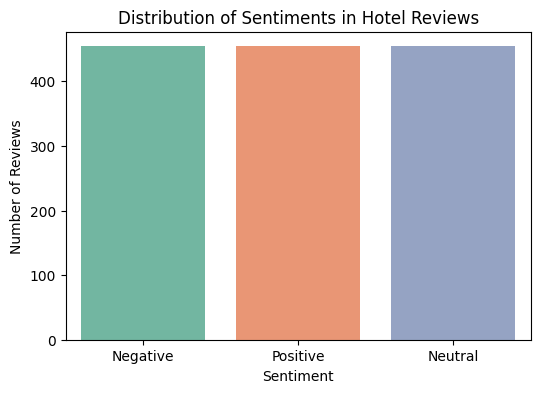

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(data=df_balanced, x='Sentiment', palette='Set2')
plt.title("Distribution of Sentiments in Hotel Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()


C:\Users\ASUS1\AppData\Local\Temp\ipykernel_19672\1328601893.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_balanced, x='Rating', palette='coolwarm')


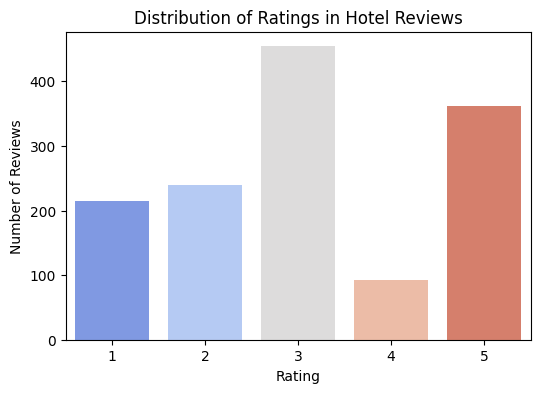

In [100]:
plt.figure(figsize=(6,4))
sns.countplot(data=df_balanced, x='Rating', palette='coolwarm')
plt.title("Distribution of Ratings in Hotel Reviews")
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.show()
